 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

In [5]:
whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)

In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()

In [9]:
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)

In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
sp500_df.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [13]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("string")
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")

C:\Users\edorion\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Calculate Daily Returns
sp_daily_returns = sp500_df.pct_change()

In [15]:
# Drop nulls
sp_daily_returns = sp_daily_returns.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns={
    "Close": "S&P 500 Closing Prices",
})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_df,sp_daily_returns], axis= 1, join="inner")
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Closing Prices
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

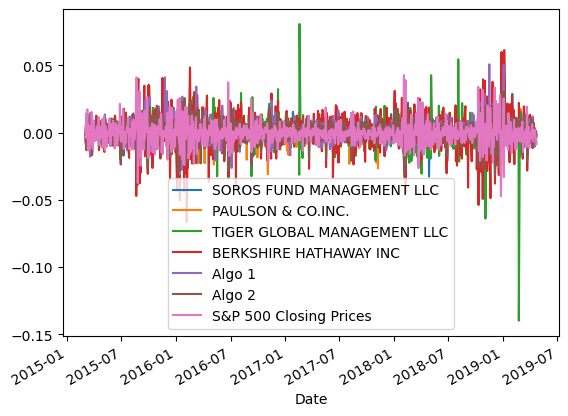

In [18]:
# Plot daily returns of all portfolios
combined_data.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

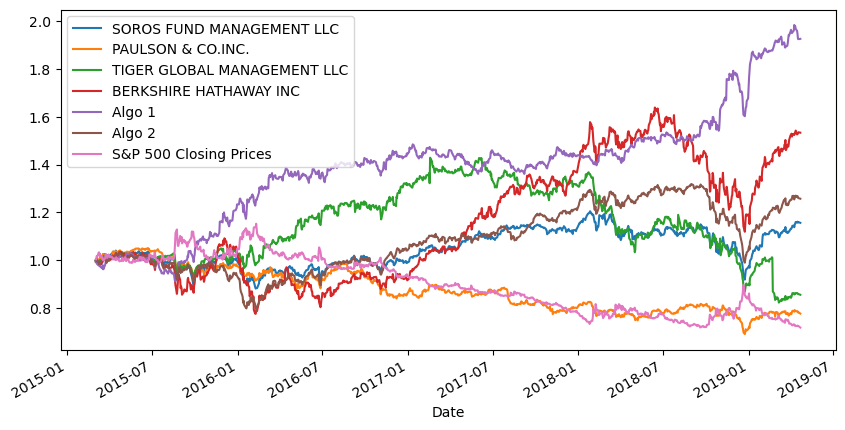

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() 
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

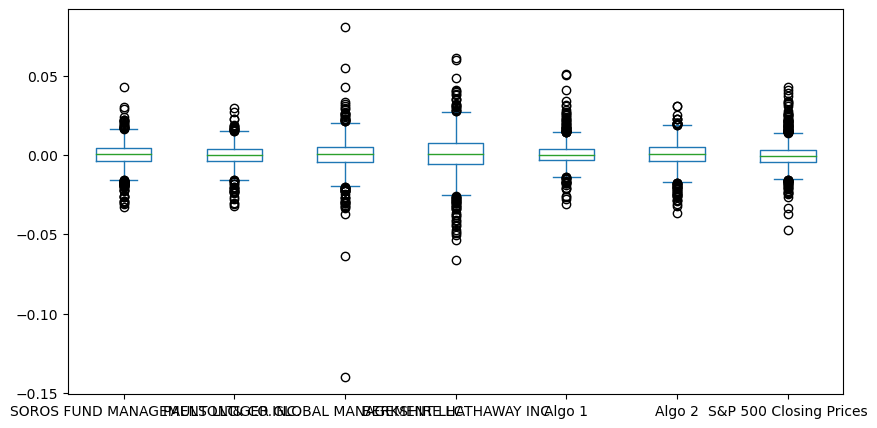

In [20]:
# Box plot to visually show risk
combined_data.plot(kind = "box", figsize = (10,5))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
data_std = combined_data.std()
data_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Closing Prices         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_snp = [data_std > data_std['S&P 500 Closing Prices']]
riskier_than_snp

[SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 S&P 500 Closing Prices         False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = data_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Closing Prices         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

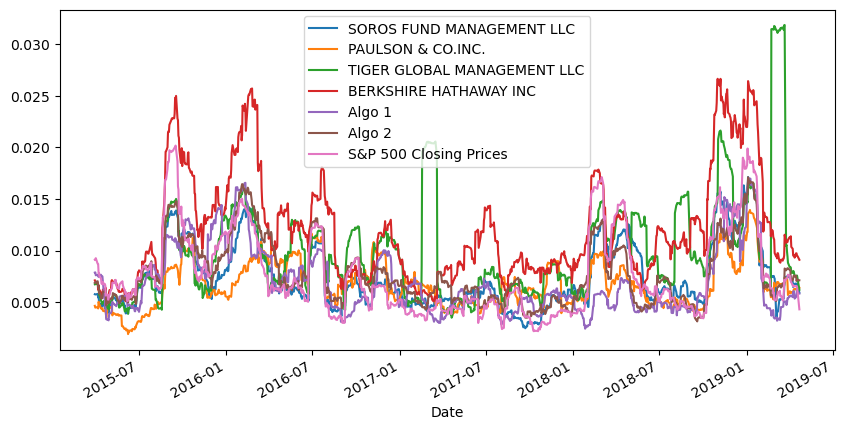

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_21day_avrg = combined_data.rolling(window = 21).std()
# Plot the rolling standard deviation
port_21day_avrg.plot(figsize = (10,5))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Closing Prices
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 Closing Prices,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

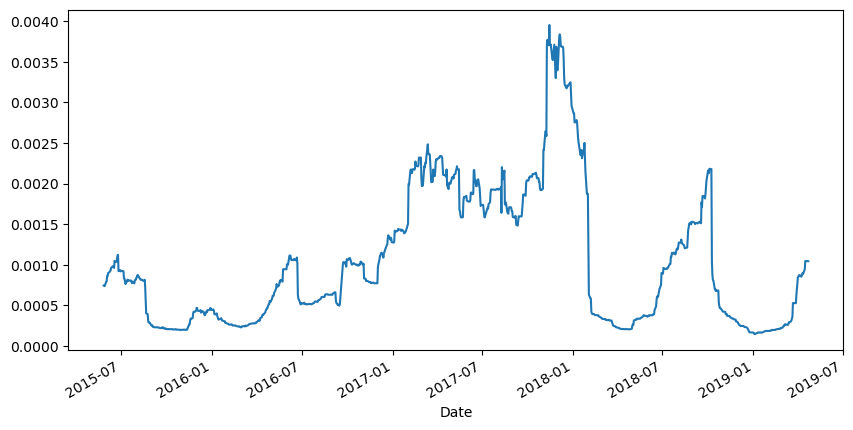

In [26]:
# Calculate covariance of a single portfolio
covariance_paul = combined_data['SOROS FUND MANAGEMENT LLC'].cov(combined_data['S&P 500 Closing Prices'])
# Calculate variance of S&P 500
variance = combined_data['S&P 500 Closing Prices'].rolling(window = 60).var()
# Computing beta
beta = covariance_paul / variance
# Plot beta trend
beta_plot = beta.plot(figsize = (10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

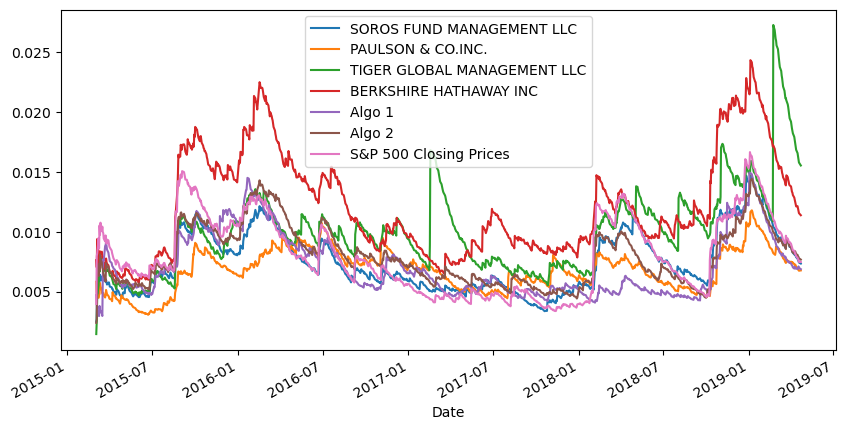

In [27]:
# Use `ewm` to calculate the rolling window
rolling_ewa = combined_data.ewm(halflife = 21, adjust=True).std().plot(figsize = (10,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean()*252) / (combined_data.std() * np.sqrt(252))

<AxesSubplot:>

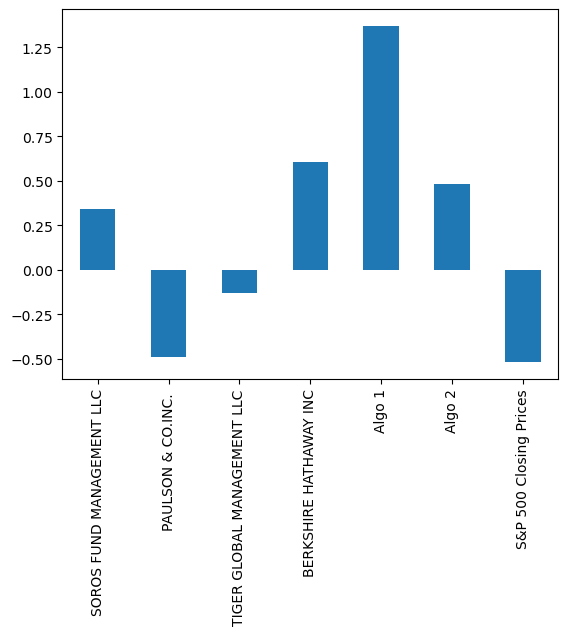

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

yes, not sure what this is asking


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
nvda_data = Path("Resources/NVDA.csv")
nvda = pd.read_csv(nvda_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)
nvda = nvda.rename(columns={"Close":"NVDA"})

In [31]:
# Reading data from 2nd stock
amzn_data = Path("Resources/AMZN.csv")
amzn = pd.read_csv(amzn_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)
amzn = amzn.rename(columns={"Close":"AMZN"})

In [32]:
# Reading data from 3rd stock
meta_data = Path("Resources/META.csv")
meta = pd.read_csv(meta_data,  index_col= "Date", infer_datetime_format=True, parse_dates=True)
meta = meta.rename(columns={"Close":"META"})

In [33]:
# Combine all stocks in a single DataFrame
combined= pd.concat([nvda, amzn, meta], axis= 1, join="inner")

In [34]:
# Reset Date index
combined.sort_index(inplace=True)

In [35]:
# Reorganize portfolio data by having a column per symbol

# did that in the previous blocks will do it again for full credit haha
combined.columns = ['NVDA Close', "AMZN Close", "META Close"]

In [36]:
# Calculate daily returns
combined_returns = combined.pct_change()
# Drop NAs
combined_returns.dropna(inplace = True)
# Display sample data
combined_returns.head(10)

,NVDA Close,AMZN Close,META Close
Date,,,
2015-03-04,0.010811,-0.004680,0.016332
2015-03-05,0.019608,0.013062,0.003832
2015-03-06,-0.013986,-0.020113,-0.014777
2015-03-09,0.001773,-0.003684,-0.007124
2015-03-10,0.017699,-0.023772,-0.023792
2015-03-11,-0.005217,-0.008658,0.000258
2015-03-12,-0.008741,0.021288,0.017533
2015-03-13,0.001764,-0.009621,-0.011149
2015-03-16,0.010563,0.007555,0.000256


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combined_returns.dot(weights)
# Display sample data
weighted_returns.tail()

Date
2019-04-24   -0.005149
2019-04-25    0.012175
2019-04-26   -0.010336
2019-04-29    0.005963
2019-04-30   -0.001268
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_data["Extra Portfolio"] = weighted_returns
combined_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Closing Prices,Extra Portfolio
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.007914
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.008121
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001475
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.003213
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.014392


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [53]:
# Calculate the annualized `std`
annualized_std_2 = combined_data*np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

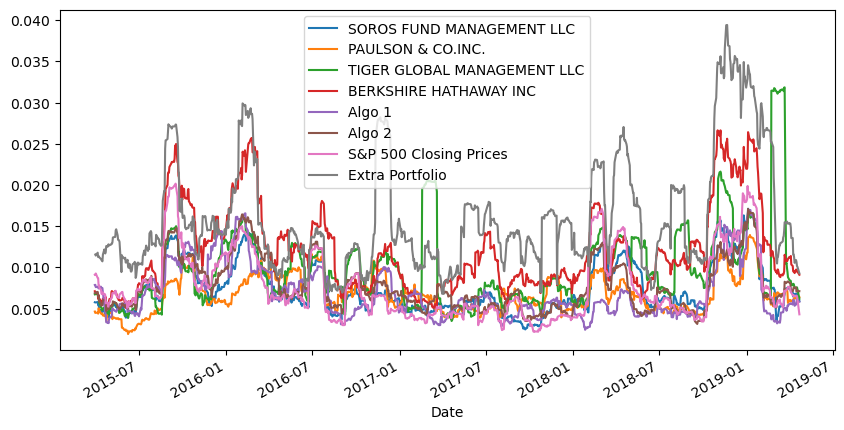

In [54]:
# Calculate rolling standard deviation
combined_data_std = combined_data.rolling(window = 21).std()
# Plot rolling standard deviation
combined_data_std.plot(figsize = (10,5))

### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
correlation_1 = combined_data.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

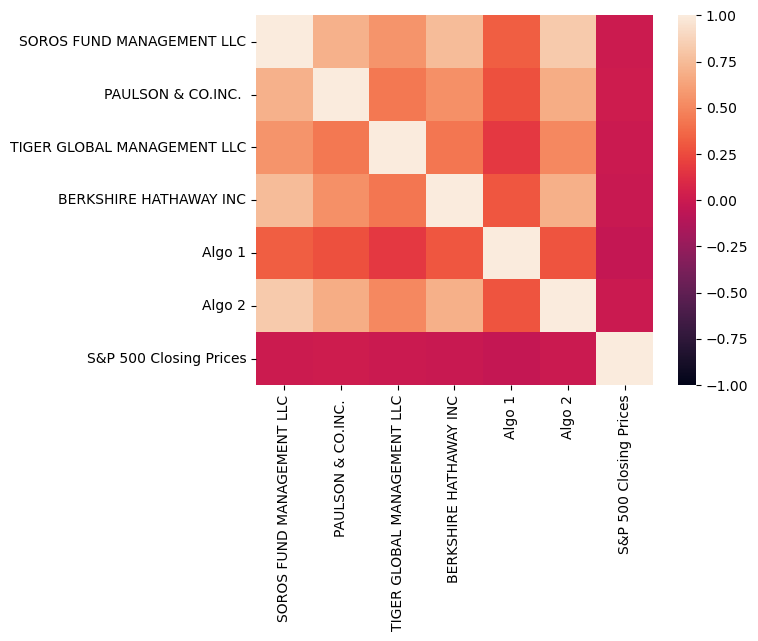

In [50]:
# Calculate and plot Beta
sns.heatmap(correlation, vmin=-1, vmax = 1)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (combined_data.mean()*252) / (combined_data.std() * np.sqrt(252))

<AxesSubplot:>

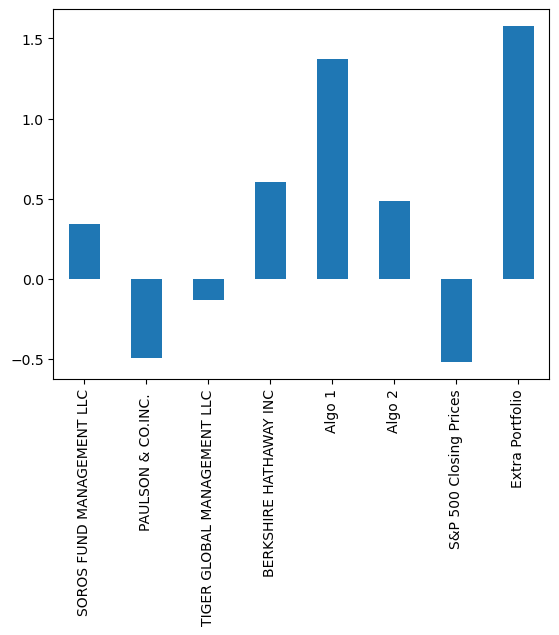

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = "bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio did the best